In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline
sns.set_context("notebook")

In [2]:
path = "/Users/eesmalling/Data/project121/"
bns = pd.read_json(path+"business.json", lines=True)
bns = bns[bns.categories.apply(lambda x: 'Restaurants' in x)]
bns = bns[bns.state.isin(['ON','QC'])]

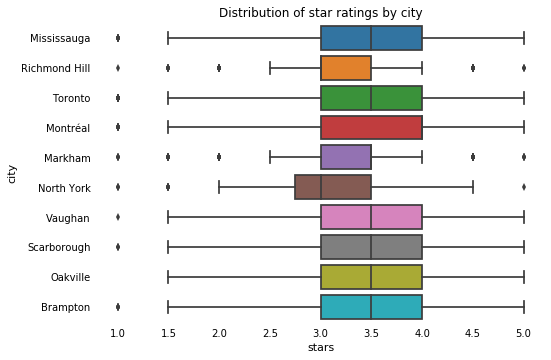

In [3]:
top = np.array(bns.city.value_counts()[0:10].index)
temp = bns[bns.city.isin(top)]
sns.boxplot(y='city', x='stars', data=temp)
ax = plt.gca()
ax.tick_params(axis='both', which='both', length=0)
plt.title('Distribution of star ratings by city')
sns.despine(left=True, bottom=True)

In [4]:
top_category = []
for i in range(len(bns.categories)):
    if len(bns.categories.iloc[i]) == 1:
        top_category.append(bns.categories.iloc[i][0])
    else:
        if bns.categories.iloc[i][0] == 'Restaurants':
            top_category.append(bns.categories.iloc[i][1])
        else:
            top_category.append(bns.categories.iloc[i][0])
bns['top_category'] = top_category

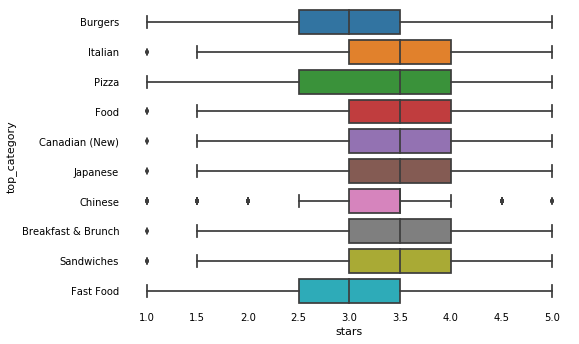

In [5]:
top = np.array(bns.top_category.value_counts()[0:10].index)
temp = bns[bns.top_category.isin(top)]
sns.boxplot(y='top_category', x='stars', data=temp)
ax = plt.gca()
ax.tick_params(axis='both', which='both', length=0)
sns.despine(left=True, bottom=True)

In [6]:
usr = pd.read_csv(path+"c_user.csv")
usr.yelping_since = pd.to_datetime(usr.yelping_since)

In [7]:
rvw = pd.read_csv(path+"c_review.csv")
rvw.date = pd.to_datetime(rvw.date)
rvw['day'] = rvw.date.dt.weekday_name
rvw['month'] = rvw.date.dt.strftime('%B')
rvw = rvw.merge(usr[['user_id','yelping_since']], how='left')
rvw['time_yelping'] = (rvw.date-rvw.yelping_since).dt.days
rvw.time_yelping[rvw.time_yelping < 1] = 1
rvw['log_time_yelping'] = np.log(rvw.time_yelping)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


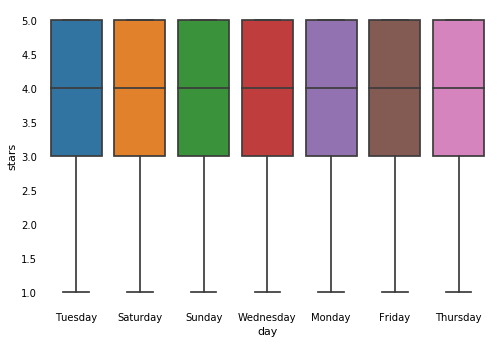

In [8]:
sns.boxplot(y='stars', x='day', data=rvw)
ax = plt.gca()
ax.tick_params(axis='both', which='both', length=0)
sns.despine(left=True, bottom=True)

In [9]:
pd.DataFrame(rvw.groupby('day')['stars'].mean().round(3)).transpose()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
stars,3.616,3.586,3.589,3.558,3.622,3.615,3.629


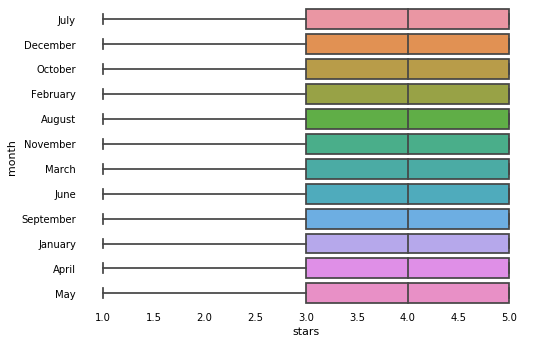

In [10]:
sns.boxplot(y='month', x='stars', data=rvw)
ax = plt.gca()
ax.tick_params(axis='both', which='both', length=0)
sns.despine(left=True, bottom=True)

In [11]:
pd.DataFrame(rvw.groupby('month')['stars'].mean().round(3)).transpose()

month,April,August,December,February,January,July,June,March,May,November,October,September
stars,3.62,3.595,3.582,3.619,3.621,3.588,3.598,3.619,3.595,3.584,3.594,3.582


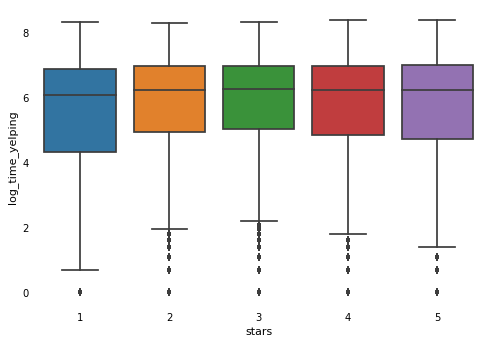

In [12]:
sns.boxplot(y='log_time_yelping', x='stars', data=rvw)
ax = plt.gca()
ax.tick_params(axis='both', which='both', length=0)
sns.despine(left=True, bottom=True)

In [13]:
pd.DataFrame(rvw.groupby('stars')['log_time_yelping'].mean().round(3)).transpose()

stars,1,2,3,4,5
log_time_yelping,5.133,5.526,5.634,5.523,5.425
